In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=5)
model = dtc1.fit(X_train, y_train)

In [ ]:
feature_col = df.columns[0:-1]

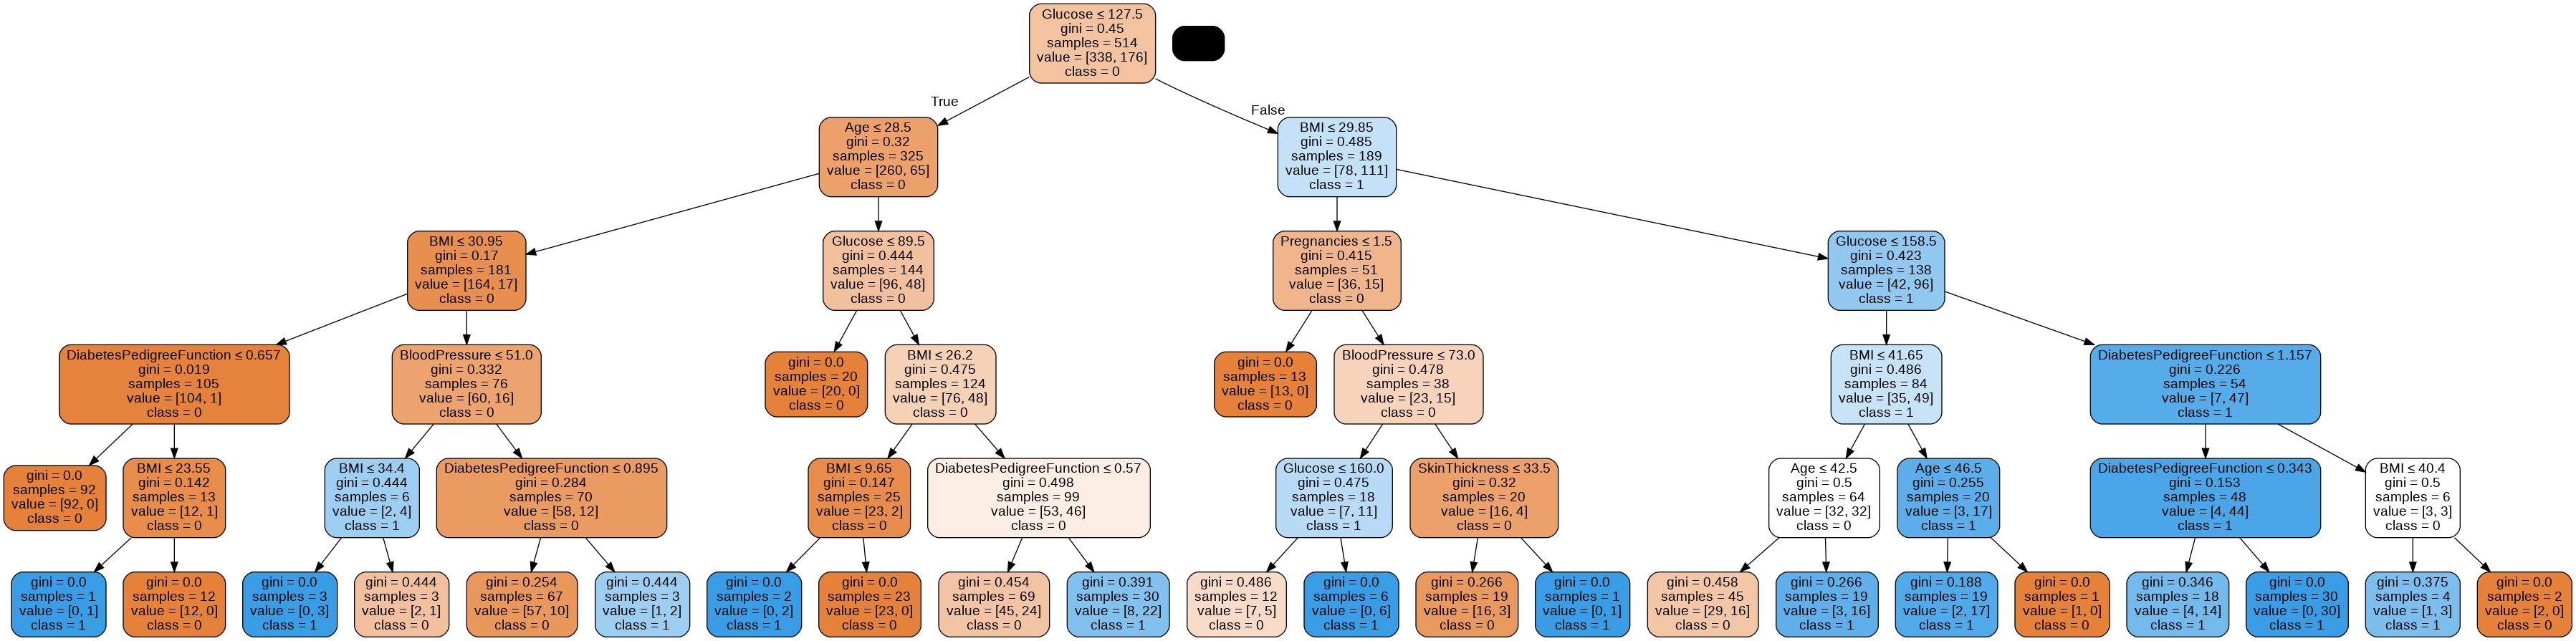

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc1, out_file=dot_data, filled=True, rounded=True,
                special_characters=True,feature_names = feature_col,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes1.png')
Image(graph.create_png())

# Model Evaluation

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
from sklearn import metrics as met
ac_score = met.accuracy_score(y_test, y_predict)
print(ac_score)

0.7244094488188977


In [ ]:
from sklearn.metrics import classification_report as cr
target_names = ['Outcome 0', 'Outcome 1']
cl_rep = cr(y_test, y_predict, target_names=target_names)
print(cl_rep)

              precision    recall  f1-score   support

   Outcome 0       0.74      0.88      0.80       162
   Outcome 1       0.68      0.46      0.55        92

    accuracy                           0.72       254
   macro avg       0.71      0.67      0.67       254
weighted avg       0.72      0.72      0.71       254



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[142  20]
 [ 50  42]]
